
# Estudo de Caso 3 – Quanto vale alugar um apê?



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 📊 Parte 1: Análise Exploratória dos Dados

In [ ]:

df = pd.read_csv("/content/dados_apartamentos.csv")  # Suba o arquivo no Colab
df.head()


,area_m2,quartos,banheiros,garagem,distancia_centro_km,andar,preco_aluguel
0,67,1,1,1,4.85,3,2689
1,57,1,1,0,4.85,9,2137
2,69,2,1,0,8.95,13,2306
3,82,2,1,1,2.23,6,3090
4,56,1,2,1,6.01,13,2701


In [ ]:

print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_m2              1000 non-null   int64  
 1   quartos              1000 non-null   int64  
 2   banheiros            1000 non-null   int64  
 3   garagem              1000 non-null   int64  
 4   distancia_centro_km  1000 non-null   float64
 5   andar                1000 non-null   int64  
 6   preco_aluguel        1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB
None
           area_m2      quartos    banheiros      garagem  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     59.806000     1.904000     1.457000     0.588000   
std      14.656506     0.698048     0.602091     0.492441   
min      20.000000     1.000000     1.000000     0.000000   
25%      50.000000     1.000000     1.000000     0.000000   
50%      60.000000     

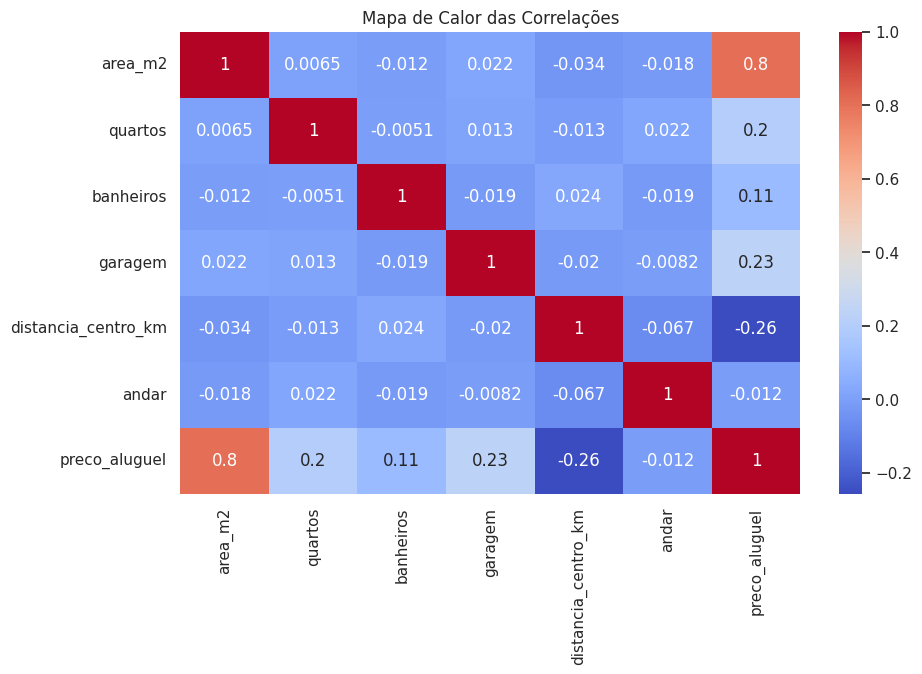

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor das Correlações")
plt.show()


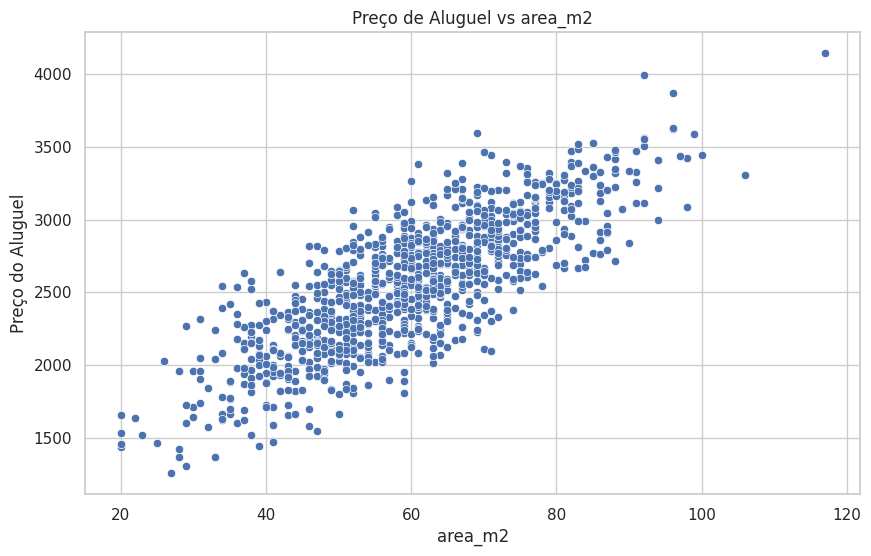

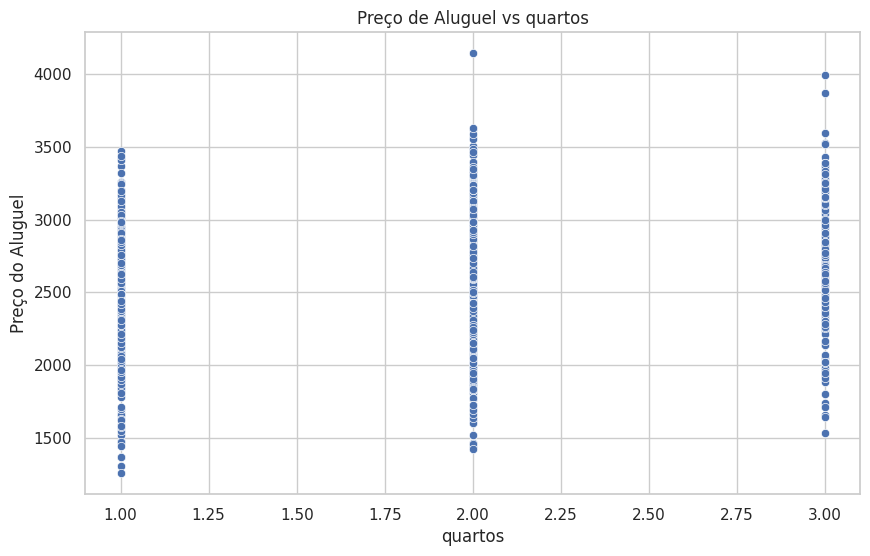

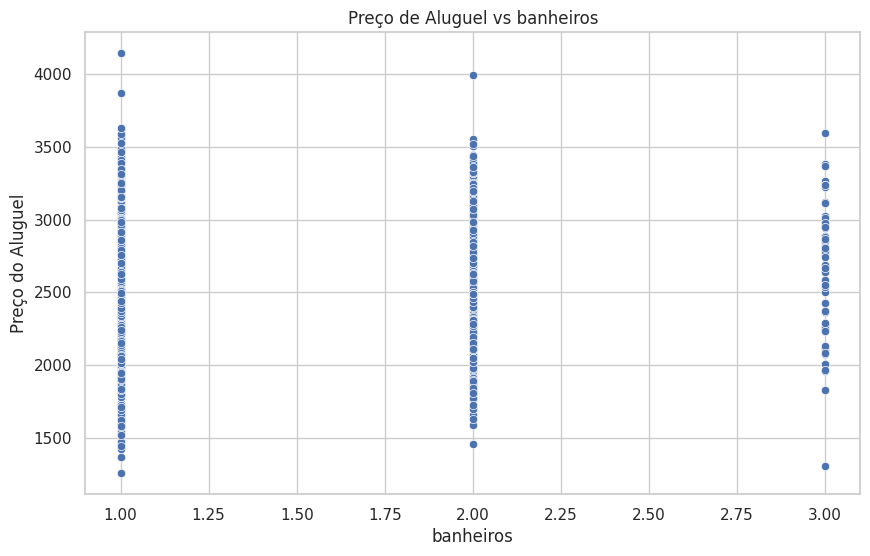

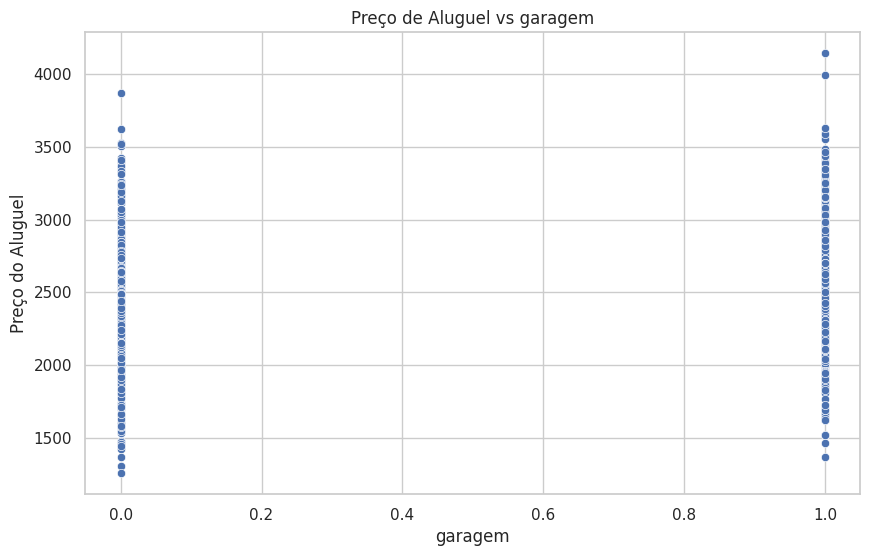

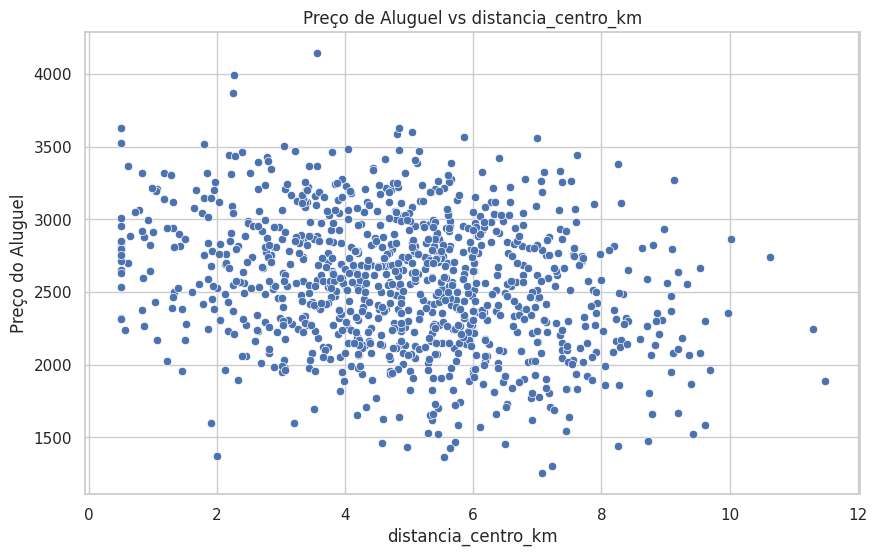

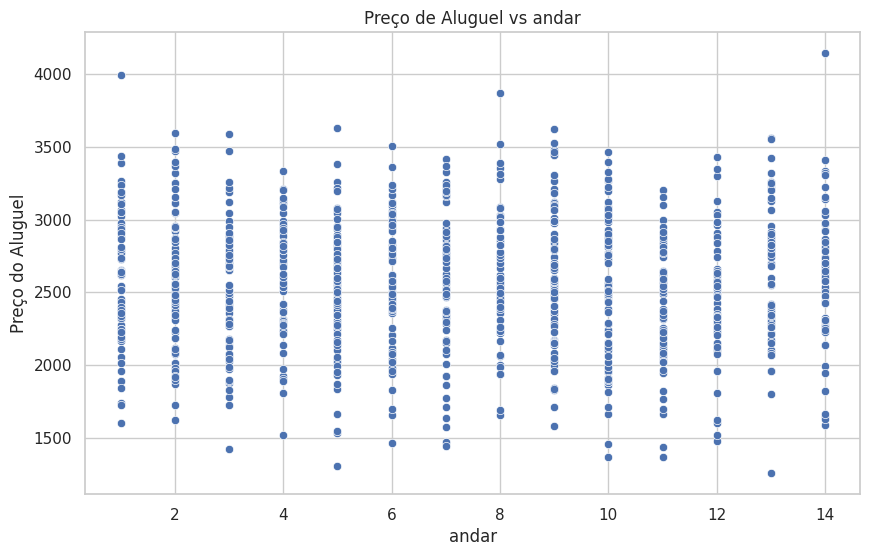

In [ ]:

variaveis = ["area_m2", "quartos", "banheiros", "garagem", "distancia_centro_km", "andar"]
for var in variaveis:
    sns.scatterplot(x=var, y="preco_aluguel", data=df)
    plt.title(f"Preço de Aluguel vs {var}")
    plt.xlabel(var)
    plt.ylabel("Preço do Aluguel")
    plt.show()


## 🤖 Parte 2: Regressão Linear

In [ ]:

X = df[["area_m2", "quartos", "banheiros", "garagem", "distancia_centro_km"]]
y = df["preco_aluguel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📏 MAE: {mae:.2f}")
print(f"📈 R² Score: {r2:.2f}")

pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": reg_model.coef_
})


📏 MAE: 158.61
📈 R² Score: 0.82


,Variável,Coeficiente
0,area_m2,24.032926
1,quartos,123.945450
2,banheiros,101.107360
3,garagem,196.855690
4,distancia_centro_km,-51.096521


## 🧠 Parte 3: Classificação - Imóveis Caros ou Baratos

Acurácia: 0.84
Precisão: 0.87
Recall: 0.83


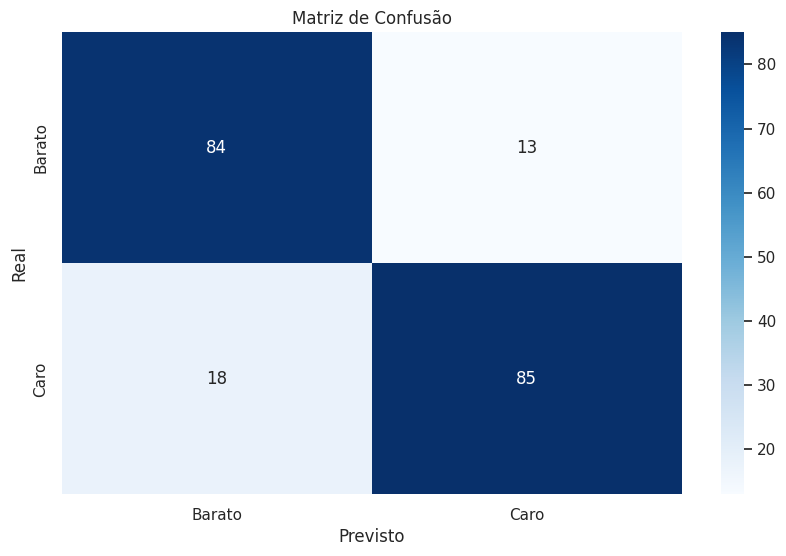

In [ ]:

media_aluguel = df["preco_aluguel"].mean()
df["caro"] = df["preco_aluguel"] > media_aluguel

X_class = X
y_class = df["caro"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(Xc_train, yc_train)
y_class_pred = clf.predict(Xc_test)

acc = accuracy_score(yc_test, y_class_pred)
prec = precision_score(yc_test, y_class_pred)
rec = recall_score(yc_test, y_class_pred)
cm = confusion_matrix(yc_test, y_class_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Barato", "Caro"], yticklabels=["Barato", "Caro"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


## 💬 Parte 4: Discussão dos Resultados


**1. O modelo previu bem o valor do aluguel?**  
Com base no R² e no MAE, o modelo de regressão linear teve um desempenho razoável, porém pode ser melhorado.

**2. O modelo classificou bem os imóveis?**  
Sim, mas a matriz de confusão sugere que há margem para otimização, principalmente com mais dados ou outro algoritmo.

**3. Propostas de melhoria:**  
- Incluir mais variáveis relevantes (ex: bairro, idade do imóvel).  
- Aplicar normalização e remoção de outliers.  
- Testar modelos mais robustos como Random Forest ou XGBoost.


## 📋 Parte 5: Conclusão do Estudo


- **Regressão Linear:** Resultados satisfatórios, com margem para melhorias.  
- **Classificação:** Desempenho razoável com boa acurácia, precisão e recall.  
- **Próximos passos:** Testar modelos mais complexos, incluir mais features e validar com cross-validation.
